In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [2]:
# create element tree object 
tree = ET.parse('export.xml') 

In [3]:
# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [4]:
# create DataFrame from a list (rows) of dictionaries (columns)
df = pd.DataFrame(record_list)
df.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,Health,11.0,cm,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,167.64,NaN
1,HKQuantityTypeIdentifierHeight,Health,13.6,cm,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,172,NaN
2,HKQuantityTypeIdentifierHeight,iPhone,14.0.1,cm,2020-09-30 02:16:13 +0300,2020-09-30 02:16:13 +0300,2020-09-30 02:16:13 +0300,173,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.0,kg,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,104,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,13.6,kg,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,105,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402292 entries, 0 to 402291
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   type           402292 non-null  object
 1   sourceName     402292 non-null  object
 2   sourceVersion  402292 non-null  object
 3   unit           397448 non-null  object
 4   creationDate   402292 non-null  object
 5   startDate      402292 non-null  object
 6   endDate        402292 non-null  object
 7   value          402284 non-null  object
 8   device         388037 non-null  object
dtypes: object(9)
memory usage: 27.6+ MB


In [6]:
# change type of Dates cols to daterime
for col in ['creationDate', 'startDate', 'endDate']:
    df[col] = pd.to_datetime(df[col])

In [7]:
# remove 'HKQuantityTypeIdentifier' from type col
df.type = df.type.str.replace('HKQuantityTypeIdentifier', '')

In [8]:
df.type.value_counts()

ActiveEnergyBurned                        146713
DistanceWalkingRunning                     52801
HeartRate                                  50531
StepCount                                  49277
BasalEnergyBurned                          34413
HeadphoneAudioExposure                     16541
AppleStandTime                             10185
WalkingSpeed                                7078
WalkingStepLength                           7060
FlightsClimbed                              6686
WalkingDoubleSupportPercentage              5785
AppleExerciseTime                           3959
HKCategoryTypeIdentifierAppleStandHour      3761
WalkingAsymmetryPercentage                  2606
HeartRateVariabilitySDNN                    1693
HKCategoryTypeIdentifierSleepAnalysis       1075
StairDescentSpeed                            632
StairAscentSpeed                             590
EnvironmentalAudioExposure                   537
RestingHeartRate                             173
WalkingHeartRateAver

In [9]:
# drop unwanted cols
df.drop(['sourceName', 'sourceVersion', 'creationDate', 'startDate', 'device'], axis=1, inplace=True)

In [10]:
df.head()

,type,unit,endDate,value
0,Height,cm,2017-10-07 17:18:21+03:00,167.64
1,Height,cm,2020-07-31 00:07:45+03:00,172
2,Height,cm,2020-09-30 02:16:13+03:00,173
3,BodyMass,kg,2017-10-07 17:18:21+03:00,104
4,BodyMass,kg,2020-07-31 00:07:45+03:00,105


In [11]:
# change value col to numeric, NaN if fails
df['value'] = pd.to_numeric(df['value'], errors='coerce')


In [12]:
# pivot df on type col
df = df.pivot_table(index='endDate', columns='type', values='value')

In [13]:
# dropping cols i dont need
df.drop(['AppleExerciseTime', 'BodyMass', 'DistanceSwimming', 'HKDataTypeSleepDurationGoal', 'SwimmingStrokeCount', 'VO2Max', 'Height'], axis=1, inplace=True)

In [14]:
df.sample()

type,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,FlightsClimbed,HeadphoneAudioExposure,HeartRate,HeartRateVariabilitySDNN,RestingHeartRate,SixMinuteWalkTestDistance,StairAscentSpeed,StairDescentSpeed,StepCount,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingHeartRateAverage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,,,,,,,,,,
2021-01-13 22:54:16+03:00,NaN,NaN,NaN,NaN,NaN,NaN,76.7355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cols = list(df.columns) # take list of all cols in df_hr
df=df.resample('M')[cols].mean() # aggregate by month
df.head()

type,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,FlightsClimbed,HeadphoneAudioExposure,HeartRate,HeartRateVariabilitySDNN,RestingHeartRate,SixMinuteWalkTestDistance,StairAscentSpeed,StairDescentSpeed,StepCount,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingHeartRateAverage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,,,,,,,,,,
2016-08-31 00:00:00+03:00,NaN,NaN,NaN,0.090755,NaN,1.210526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.587004,NaN,NaN,NaN,NaN,NaN
2016-09-30 00:00:00+03:00,NaN,NaN,NaN,0.083551,NaN,1.028409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.772858,NaN,NaN,NaN,NaN,NaN
2016-10-31 00:00:00+03:00,NaN,NaN,NaN,0.161479,NaN,1.003300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.307692,NaN,NaN,NaN,NaN,NaN
2016-11-30 00:00:00+03:00,NaN,NaN,NaN,0.177786,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.042308,NaN,NaN,NaN,NaN,NaN
2016-12-31 00:00:00+03:00,NaN,NaN,NaN,0.170912,NaN,1.003012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.560051,NaN,NaN,NaN,NaN,NaN


## What factors affect my heart rate?

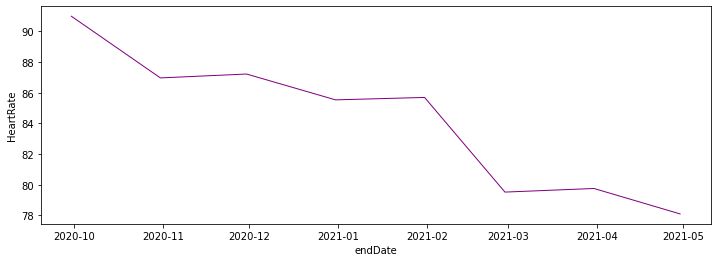

In [16]:
# HeartRate time series
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=df['HeartRate'], color='purple', linewidth=1);

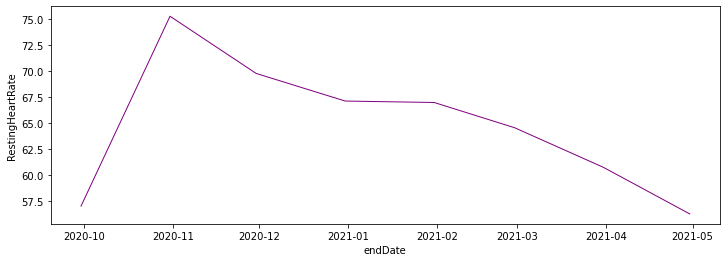

In [20]:
# RestingHeartRate time series
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=df['RestingHeartRate'], color='purple', linewidth=1);

We can clearly see that my avg heart & resting heart rates have gone down with time. This makes perfect sense since I started the ketogenic diet on Sept. and lost over 26 kgs and got fitter!

This as well makes sense becuase a couple days after starting my diet I also started going to the gym and exercising consistenly!

>Note: a low HRV (or less variability in the heart beats) indicates that the body is under stress from exercise, psychological events, or other internal or external stressors.

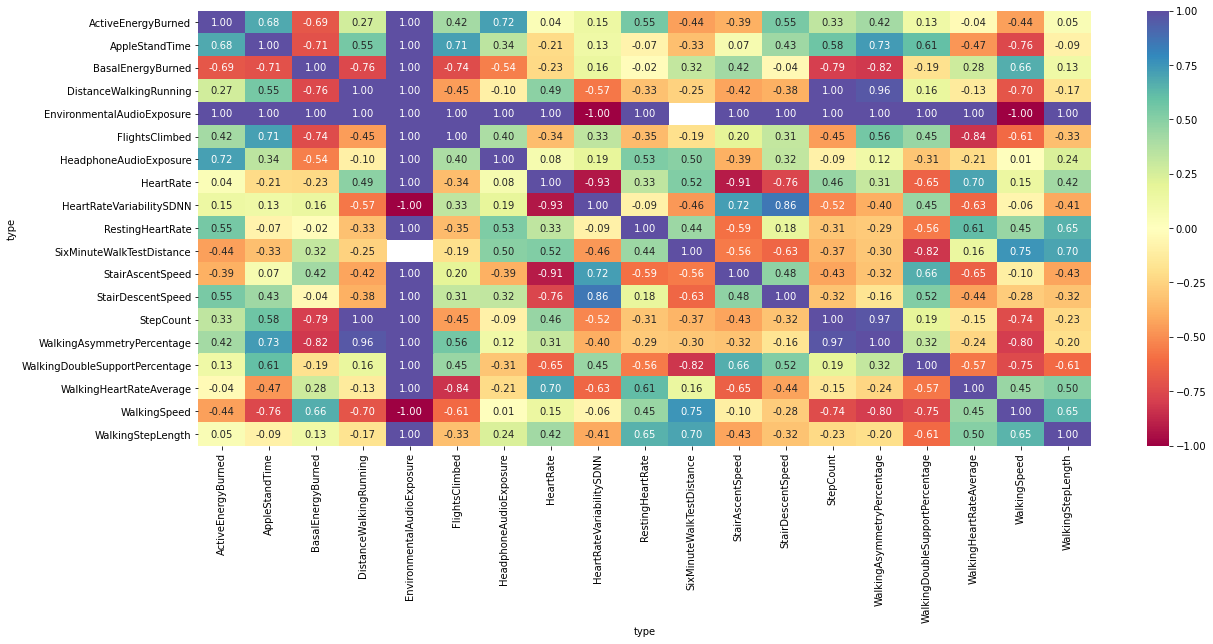

In [19]:
# correlation matrix
cm = df.corr()

# heatmap
fig = plt.figure(figsize=(20,8)) 
sns.heatmap(cm, annot=True, fmt=".2f", vmin=-1.0, vmax=+1.0, cmap='Spectral');

The correlation matrix provides valuable insights on the correlations between all the variables in this dataset:
- `WalkingDoubleSupportPercentage` correlats negatively with `HeartRate` which makes sense as I have both feet on the ground less when im exercising(running)
- HeartRateVariabilitySDNN time series

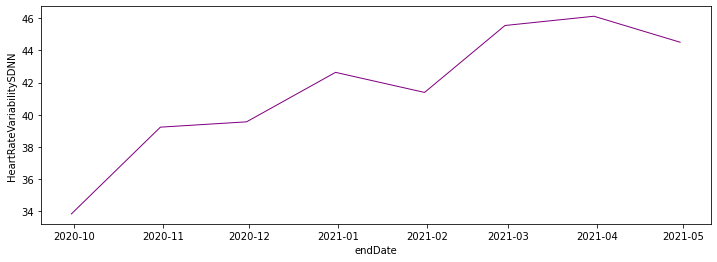

In [21]:
# HeartRateVariabilitySDNN time series
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=df['HeartRateVariabilitySDNN'], color='purple', linewidth=1);

# Conclusion

- I wanted to see what factors affect my BodyMass but I only had 5 data points so I chose Heartrate instead.
- I am not sure why my resting heart rate was low on October 2020 when my heart rate was at its highest !